In [ ]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
pd.set_option("display.max_columns",999)
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df_emails = pd.read_csv('email_data.csv',delimiter=',')
display(df_emails.head())
df_activity = pd.read_csv('activity_data.csv',delimiter=',')
display(df_activity.head())

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,NaN,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,NaN,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,NaN,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,NaN,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,NaN,NaN


,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136


In [ ]:
#1: Number of rows in emails dataset
df_emails.count()

LogId                      474163
EmailSentDateTimeUtc       474163
EmailCampaignId            474163
EmailOpenedDateTimeUtc     139822
EmailClickedDateTimeUtc     23251
UserId                     474163
ZipCode                    322050
AddressData                397932
dtype: int64

In [ ]:
#1: Number of rows in activity dataset
df_activity.count()

UserId               4559973
DateOfActivityPST    4559973
ActivityCount        4559973
dtype: int64

In [ ]:
#1: Total emails sent over this period
emails_in_dataset = df_emails.LogId.count()
total_emails = emails_in_dataset/0.03 
total_emails

15805433.333333334

In [ ]:
#2: Earliest and most recent dates of emails sent in California time
import pytz
#Pull variable of interest (date email sent)
dates_PST =  pd.DataFrame(df_emails, columns=['EmailSentDateTimeUtc'])
#Convert time from UTC to PST 
dates_PST['EmailSentDateTimeUtc']=pd.to_datetime(dates_PST['EmailSentDateTimeUtc'])  
dates_PST.set_index('EmailSentDateTimeUtc',drop=True, inplace=True)
dates_PST.index  = dates_PST.index.tz_localize('UTC').tz_convert('US/Pacific')
dates_PST.reset_index(inplace=True)
#Rename column
dates_PST = dates_PST.rename(columns = {'EmailSentDateTimeUtc':'EmailSentDateTimePst'})
#Output
dates_PST

,EmailSentDateTimePst
0,2019-07-31 08:13:25.817000-07:00
1,2019-08-01 19:15:52.447000-07:00
2,2019-08-07 09:21:37.293000-07:00
3,2019-08-07 09:38:03.323000-07:00
4,2019-08-12 04:45:43.293000-07:00
...,...
474158,2021-04-07 12:54:26.493000-07:00
474159,2021-04-08 09:49:23.040000-07:00
474160,2021-04-01 14:42:34.750000-07:00
474161,2021-04-04 11:42:25.683000-07:00


In [ ]:
#3: 10 zip codes that receive the most emails and how many
zipcodes = df_emails['ZipCode'].value_counts()
zipcodes.head(10)

63301.000    312
33801.000    310
34210.000    299
38301.000    295
67460.000    285
95971.000    277
42301.000    266
36104.000    254
40769.000    234
85225.000    229
Name: ZipCode, dtype: int64

<AxesSubplot:xlabel='Year-Month'>

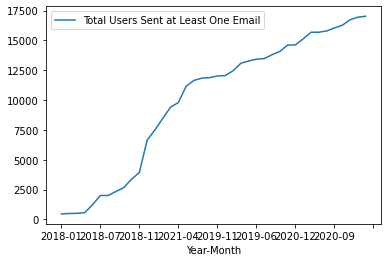

In [ ]:
#4a: Plot of total distinct users who were sent at least 1 email by month and year
#Pull variables of interest (date email sent in PST and UserId)
df_emails['EmailSentDateTimePst'] = dates_PST['EmailSentDateTimePst'].astype(str)
df1 = pd.DataFrame(df_emails, columns=['UserId','EmailSentDateTimePst'])
#Create column that displays only the month and year of email sent and delete the original
df1['YearMonthEmailSentPst'] = df1['EmailSentDateTimePst'].str[:7]
del df1["EmailSentDateTimePst"]
#Remove duplicates so that a distinct user is only counted once per month
df1=df1.drop_duplicates() 
#Create dataframe that displays the total number of distinct users sent an email each month in ascending order
df1=pd.DataFrame(df1.YearMonthEmailSentPst.value_counts(), columns=["YearMonthEmailSentPst"])
df1.reset_index(inplace=True)
df1 = df1.sort_values(by="YearMonthEmailSentPst",ascending=True)
#Rename columns
df1 = df1.rename(columns = {'YearMonthEmailSentPst':'Total Users Sent at Least One Email'})
df1 = df1.rename(columns = {'index':'Year-Month'})
#Output
df1.plot(x='Year-Month',y='Total Users Sent at Least One Email',kind="line")

<AxesSubplot:xlabel='Year-Month'>

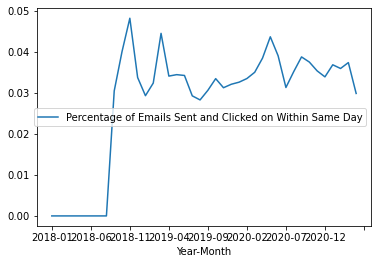

In [ ]:
#4b: Plot of the monthly percentage of emails that were sent and acted on within the same day
import numpy as np
#Convert EmailClickedDateTimeUtc to PST (EmailSentDateTimeUtc was already converted above) so that time is consistent
dates2_PST =  pd.DataFrame(df_emails, columns=['EmailClickedDateTimeUtc'])
dates2_PST['EmailClickedDateTimeUtc']=pd.to_datetime(dates2_PST['EmailClickedDateTimeUtc'])
dates2_PST.set_index('EmailClickedDateTimeUtc',drop=True, inplace=True)
dates2_PST.index  = dates2_PST.index.tz_localize('UTC').tz_convert('US/Pacific')
dates2_PST.reset_index(inplace=True)
dates2_PST = dates2_PST.rename(columns = {'EmailClickedDateTimeUtc':'EmailClickedDateTimePst'})
#Pull variables of interest (date email sent in PST and date email acted on in PST)
df_emails['EmailClickedDateTimePst'] = dates2_PST['EmailClickedDateTimePst'].astype(str)
df2 = pd.DataFrame(df_emails, columns=['EmailSentDateTimePst','EmailClickedDateTimePst'])
#Create column that displays only the month and year for each time variable
df2['YearMonthEmailClickedPst'] = df2['EmailClickedDateTimePst'].str[:7] #creates column that only shows year-month
df2['YearMonthEmailSentPst'] = df2['EmailSentDateTimePst'].str[:7]
#Obtain total number of emails sent each month
df2a = pd.DataFrame(df2.YearMonthEmailSentPst.value_counts(), columns=["YearMonthEmailSentPst"])
df2a.reset_index(inplace=True)
df2a = df2a.rename(columns = {'index':'Year-Month'})
df2a = df2a.rename(columns = {'YearMonthEmailSentPst':'TotalEmailsSentPerMonth'})
df2a = df2a.sort_values(by="Year-Month",ascending=True)
#Create column that displays only the day month and year for each time variable
df2['YearMonthEmailClickedPst2'] = df2['EmailClickedDateTimePst'].str[:10] #creates column that only shows year-month
df2['YearMonthEmailSentPst2'] = df2['EmailSentDateTimePst'].str[:10]
#Obtain number of emails that were clicked on the same day they were sent each month
df2['EmailsClickedSameDayAsSent'] = np.where(df2['YearMonthEmailClickedPst2']==df2['YearMonthEmailSentPst2'], 1,np.nan) 
df2b = pd.DataFrame(df2.groupby(["YearMonthEmailSentPst"]).count().sort_values(["EmailsClickedSameDayAsSent"], ascending=False),columns=['EmailsClickedSameDayAsSent'])
df2b.reset_index(inplace=True)
df2b = df2b.sort_values(by="YearMonthEmailSentPst",ascending=True)
#Pull new variables of interest and create column with necessary percentage
df3 = pd.DataFrame(df2a, columns=['Year-Month','TotalEmailsSentPerMonth'])
df3['EmailsClickedSameDayAsSent'] = df2b['EmailsClickedSameDayAsSent']
df3['Percentage of Emails Sent and Clicked on Within Same Day'] = df3['EmailsClickedSameDayAsSent']/df3['TotalEmailsSentPerMonth']
#Output
df3.plot(x='Year-Month',y='Percentage of Emails Sent and Clicked on Within Same Day',kind="line")